<a href="https://colab.research.google.com/github/AroobaHanif/Titanic-EDA-Visualization/blob/main/Feature_Scaling_and_Distribution_Comparison.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [48]:
# Name: Arooba Hanif
# Roll Number: Ezi-ML-B1-227
# Shift Time: Remote
# Internship Type: Hybird/Remote

# TASK 02

# DATASET USED: Titanic data set link : https://www.kaggle.com/datasets/yasserh/titanic-dataset

In [ ]:
# STEP 0: Import libraries and load dataset
import pandas as pd

df = pd.read_csv("Titanic-Dataset.csv")
# Show first few rows
df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
# check missing Values
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [ ]:
# Import the required imputer
from sklearn.impute import SimpleImputer

# Create an imputer object with strategy='most_frequent' for categorical columns
embarked_imputer = SimpleImputer(strategy='most_frequent')

# Apply the imputer and assign the result back to the 'Embarked' column
# Use .ravel() to flatten the 2D array into 1D for assignment to the column
df['Embarked'] = embarked_imputer.fit_transform(df[['Embarked']]).ravel()

# Check again to confirm no missing values remain in 'Embarked'
df['Embarked'].isnull().sum()


np.int64(0)

In [ ]:
# STEP 3: Extract title from 'Name'
df['Title'] = df['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)

# Replace rare or similar titles
df['Title'] = df['Title'].replace(['Lady','Countess','Capt','Col','Don','Dr','Major','Rev',
                                   'Sir','Jonkheer','Dona'], 'Rare')
df['Title'] = df['Title'].replace({'Mlle': 'Miss', 'Ms': 'Miss', 'Mme': 'Mrs'})

# Show unique titles
df['Title'].unique()


array(['Mr', 'Mrs', 'Miss', 'Master', 'Rare'], dtype=object)

In [ ]:
# STEP 4: Create FamilySize = SibSp + Parch + 1
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1

# Show sample data
df[['SibSp', 'Parch', 'FamilySize']].head()


,SibSp,Parch,FamilySize
0,1,0,2
1,1,0,2
2,0,0,1
3,1,0,2
4,0,0,1


In [ ]:
# STEP 5: Drop columns not useful for prediction (only if they exist)
columns_to_drop = ['Name', 'Ticket', 'Cabin', 'PassengerId']
existing_columns_to_drop = [col for col in columns_to_drop if col in df.columns]

df.drop(existing_columns_to_drop, axis=1, inplace=True)

# View remaining columns
df.columns


Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked', 'Title', 'FamilySize'],
      dtype='object')

In [ ]:
from sklearn.preprocessing import LabelEncoder

# STEP 6a: Label Encode 'Sex' (binary categorical)
df['Sex'] = LabelEncoder().fit_transform(df['Sex'])

# STEP 6b: One-Hot Encode 'Embarked' and 'Title'
df = pd.get_dummies(df, columns=['Embarked', 'Title'], drop_first=True)

# Show final column names
df.columns


Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'FamilySize', 'Embarked_Q', 'Embarked_S', 'Title_Miss', 'Title_Mr',
       'Title_Mrs', 'Title_Rare'],
      dtype='object')

In [ ]:
from sklearn.preprocessing import StandardScaler

# STEP 7: Apply standard scaling to numerical columns
scaler = StandardScaler()

# Choose numeric columns to scale
num_cols = ['Age', 'Fare', 'FamilySize']
df[num_cols] = scaler.fit_transform(df[num_cols])

# Show scaled values
df[num_cols].describe()


,Age,Fare,FamilySize
count,7.140000e+02,8.910000e+02,8.910000e+02
mean,2.388379e-16,3.987333e-18,-2.392400e-17
std,1.000701e+00,1.000562e+00,1.000562e+00
min,-2.016979e+00,-6.484217e-01,-5.609748e-01
25%,-6.595416e-01,-4.891482e-01,-5.609748e-01
50%,-1.170488e-01,-3.573909e-01,-5.609748e-01
75%,5.718310e-01,-2.424635e-02,5.915988e-02
max,3.465126e+00,9.667167e+00,5.640372e+00


In [ ]:
# STEP 8a: Check again for any missing values
print(df.isnull().sum())

# STEP 8b: Save final cleaned dataset
df.to_csv('titanic_preprocessed.csv', index=False)
print("Dataset saved as titanic_preprocessed.csv")


Survived        0
Pclass          0
Sex             0
Age           177
SibSp           0
Parch           0
Fare            0
FamilySize      0
Embarked_Q      0
Embarked_S      0
Title_Miss      0
Title_Mr        0
Title_Mrs       0
Title_Rare      0
dtype: int64
Dataset saved as titanic_preprocessed.csv


In [ ]:
print(df.filter(regex='Sex_|Embarked_|Deck_|Title_').head())

   Embarked_Q  Embarked_S  Title_Miss  Title_Mr  Title_Mrs  Title_Rare
0       False        True       False      True      False       False
1       False       False       False     False       True       False
2       False        True        True     False      False       False
3       False        True       False     False       True       False
4       False        True       False      True      False       False


Scaled columns added: ['Age_scaled', 'Fare_scaled', 'SibSp_scaled', 'Parch_scaled']


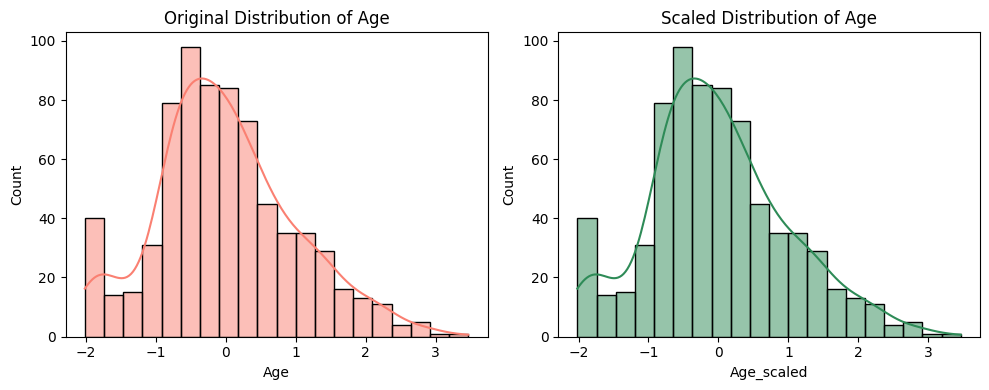

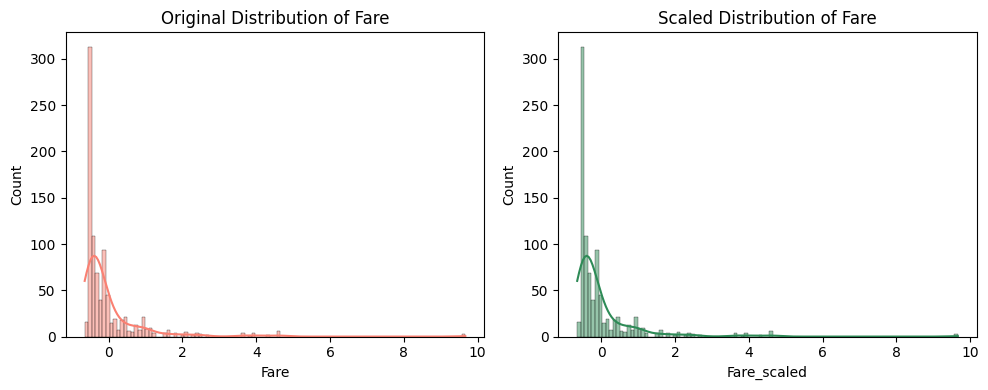

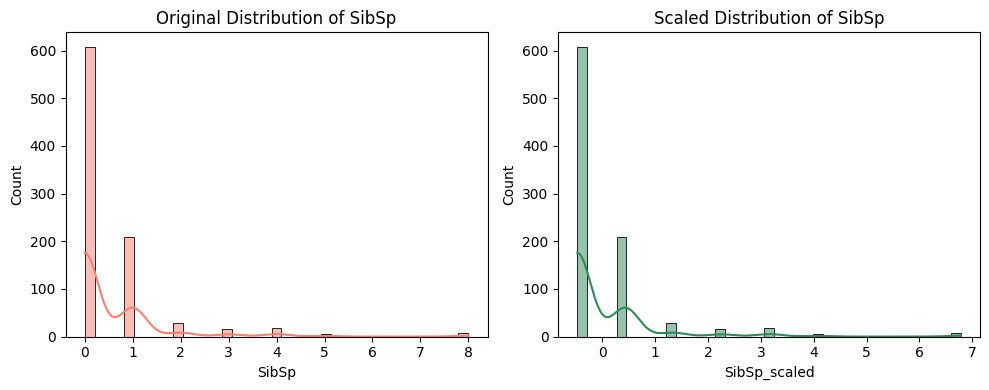

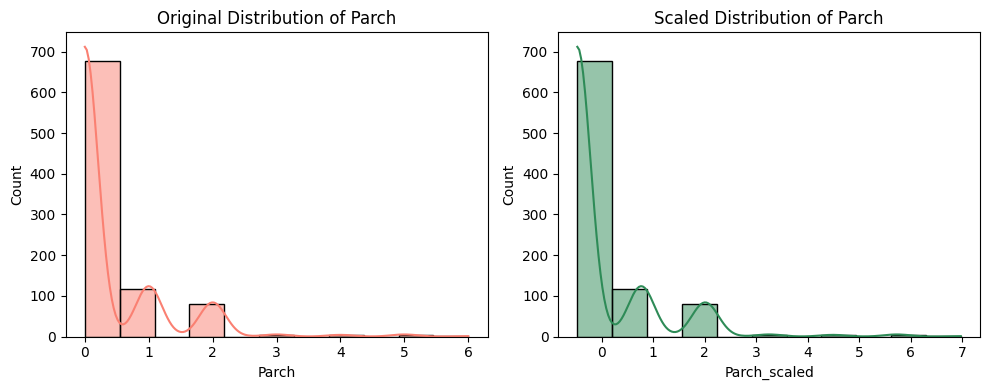

In [ ]:
# STEP 7a: Scaling numerical features and saving with '_scaled' suffix
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_features = ['Age', 'Fare', 'SibSp', 'Parch']
scaled_data = scaler.fit_transform(df[scaled_features])

# Add new columns with '_scaled' suffix
for i, feature in enumerate(scaled_features):
    df[feature + '_scaled'] = scaled_data[:, i]

print("Scaled columns added:", [col + '_scaled' for col in scaled_features])


# STEP 7b: Compare original vs scaled distributions using histograms
import seaborn as sns
import matplotlib.pyplot as plt

features = ['Age', 'Fare', 'SibSp', 'Parch']

for feature in features:
    plt.figure(figsize=(10, 4))

    # Original distribution
    plt.subplot(1, 2, 1)
    sns.histplot(df[feature], kde=True, color='salmon')
    plt.title(f"Original Distribution of {feature}")

    # Scaled distribution
    plt.subplot(1, 2, 2)
    sns.histplot(df[feature + '_scaled'], kde=True, color='seagreen')
    plt.title(f"Scaled Distribution of {feature}")

    plt.tight_layout()
    plt.show()
